In [1]:
#required imports
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from math import sqrt 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer


In [2]:
#load features
features = pd.read_csv("features.csv")
features.head()

,Day,Month,Season,Weekday,Holiday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes,Rented Bikes (Future)
0,1,January,Winter,Monday,False,partly-cloudy-day,fog,0.88,0.94,1.59,0.55,46.740,36.295,281,279
1,2,January,Winter,Tuesday,False,partly-cloudy-day,partly-cloudy-day,0.86,0.88,2.07,1.59,42.150,46.740,279,274
2,3,January,Winter,Wednesday,False,clear-day,partly-cloudy-day,0.86,0.86,4.13,2.07,45.450,42.150,274,161
3,4,January,Winter,Thursday,False,rain,clear-day,0.87,0.86,3.60,4.13,46.200,45.450,161,270
4,5,January,Winter,Friday,False,partly-cloudy-day,rain,0.81,0.87,7.43,3.60,56.085,46.200,270,62


In [3]:
#transorm non-numerical labels to numerical labels
le = LabelEncoder()
features.loc[:,'Holiday'] = le.fit_transform(features['Holiday'])

In [4]:
cleanup_nums = {"Month":   {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12},
               "Season": {"Spring": 1, "Summer": 2, "Autumn": 3, "Winter": 4},
               "Weekday": {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4,
                                  "Friday": 5, "Saturday": 6, "Sunday":7 },
               "Daily Weather": {"clear-day": 1, "partly-cloudy-day": 2,"cloudy":3,"wind":4, "rain": 5, "fog": 6, "snow": 7},
               "Daily Weather (Past)": {"clear-day": 1, "partly-cloudy-day": 2,"cloudy":3,"wind":4, "rain": 5,"fog": 6, "snow": 7} }

In [5]:
features.replace(cleanup_nums, inplace=True)

In [6]:
#target variable
y = features['Rented Bikes'].tolist()
len(y)

1514

In [7]:
#Feature Matrix with past and today data
X=features.loc[:,['Day','Month','Season','Weekday','Daily Weather','Daily Weather (Past)','Humidity','Humidity (Past)','Windspeed', 'Windspeed (Past)', 'Apparent Temperature (Avg)','Apparent Temperature (Avg) (Past)','Rented Bikes (Future)']]
X.head()

,Day,Month,Season,Weekday,Daily Weather,Daily Weather (Past),Humidity,Humidity (Past),Windspeed,Windspeed (Past),Apparent Temperature (Avg),Apparent Temperature (Avg) (Past),Rented Bikes (Future)
0,1,1,4,1,2,6,0.88,0.94,1.59,0.55,46.740,36.295,279
1,2,1,4,2,2,2,0.86,0.88,2.07,1.59,42.150,46.740,274
2,3,1,4,3,1,2,0.86,0.86,4.13,2.07,45.450,42.150,161
3,4,1,4,4,5,1,0.87,0.86,3.60,4.13,46.200,45.450,270
4,5,1,4,5,2,5,0.81,0.87,7.43,3.60,56.085,46.200,62


In [31]:
#Split into train and test set
X_train =X.loc[0:1211]
X_test= X.loc[1212:1514]
y_train = y[0:1212]
y_test=y[1212:1514]
#scaler = StandardScaler()#rmse=103
#scaler = Normalizer()#rmse=94
#scaler = MinMaxScaler()#rmse=60
#scaler = MaxAbsScaler()#rmse=57
#scaler = RobustScaler(quantile_range=(25, 75))#rmse=88
#scaler = QuantileTransformer(output_distribution='normal')#rmse=97
scaler = QuantileTransformer(output_distribution='uniform')#rmse=46
#X_train_scaled = preprocessing.normalize(X_train)#rmse=94
#X_test_scaled = preprocessing.normalize(X_test)
#X_train_scaled = preprocessing.scale(X_train)#rmse=87
#X_test_scaled = preprocessing.scale(X_test)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
last =y_train[-1]
last

393

In [39]:
#initialize MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes=(10,5),  activation='relu', solver='lbfgs', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

m = mlp.fit(X_train_scaled,y_train)

predictions = m.predict(X_train_scaled)
#last =predictions[-1]
#last
#y.append(last)
#len(y)

In [41]:
#Compare predicted and actual values
df = pd.DataFrame({'Actual': y_train, 'Predicted': predictions})  
df.head()

,Actual,Predicted
0,281,277.107068
1,279,282.933457
2,274,276.998047
3,161,281.471161
4,270,310.686834


In [42]:
#RMSE version 1
a=df.loc[:,'Actual']
b=df.loc[:,'Predicted']
rmse=sqrt(mean_squared_error(a, b))  
"The root mean square error of the model is {0:.3f}".format(rmse) 

'The root mean square error of the model is 51.184'

In [34]:
#Save predicted and actual values into csv
daysTmp = X.values[:,0]
day = daysTmp[1212:1514].astype(int)
df = pd.DataFrame({'Day':day,'Actual': y_test, 'Predicted': predictions})  
df.to_csv('predictionRaw.csv')

In [43]:
#Save predicted and actual values of training data into csv
daysTmp = X.values[:,0]
day = daysTmp[0:1212].astype(int)
df = pd.DataFrame({'Day':day,'Actual': y_train, 'Predicted': predictions})  
df.to_csv('training.csv')

In [52]:
#read csv with the same length as the feature matrix for y values after day 1212
predict = pd.read_csv('prediction.csv')
predict.head()
#x = predict.values[:,0]
#ynew = predict.values[:,2]

,Day,Actual,Predicted
0,1,0,0.0
1,2,0,0.0
2,3,0,0.0
3,4,0,0.0
4,5,0,0.0


In [55]:
#read csv with the same length as the feature matrix for y values until day 1212
training = pd.read_csv('trainingCleaned.csv')
training.head()
train = training.values[:,0]
ytrain = training.values[:,2]

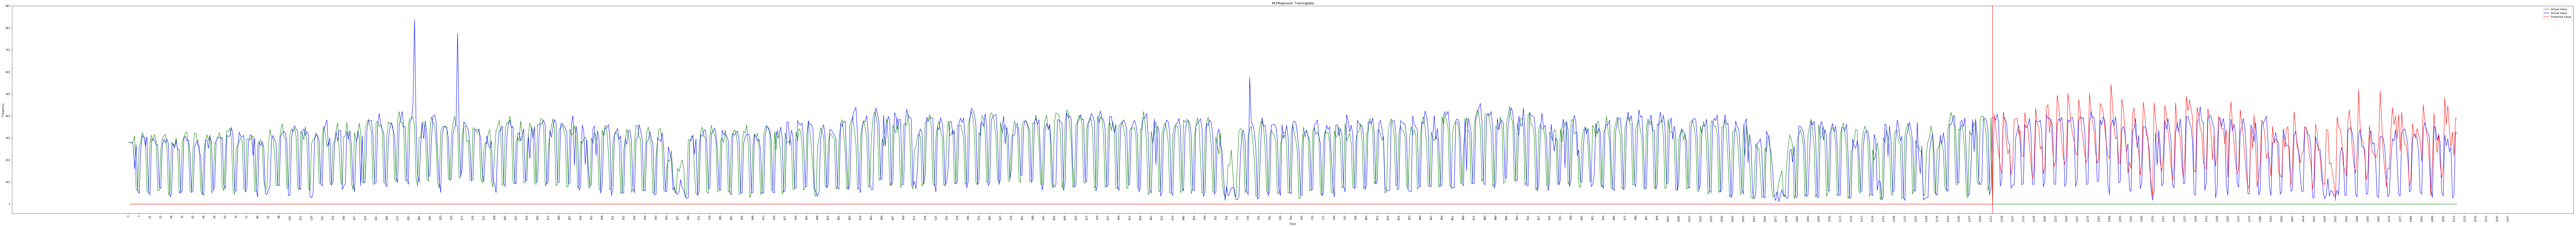

In [57]:
fig = plt.figure(figsize=(396,15))
plt.subplot(121)
plt.plot(xtrain, ytrain, color = 'green',label='Actual Value') 
plt.plot(X.values[:,0], y, color = 'blue',label='Actual Value') 
plt.plot(x, ynew, color = 'red',label='Predicted Value') 
plt.legend()
plt.yticks(np.arange(1, 1000, step=100))
plt.xticks(np.arange(0, 1550, step=7),rotation='vertical')
plt.axvline(x=1212,color='red')
plt.title("MLPRegressor Trainingdata")
plt.ylabel("Frequency")
plt.xlabel("Days")

plt.show() 
fig.savefig('img/plot.png')